# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: Зыков Валерий

Дата выдачи: <span style="color:red">__20 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__6 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2024`

In [31]:
import numpy as np
np.random.seed(42)

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

Пусть $\tilde{y} = \begin{bmatrix} \tilde{y}_1 \\ \vdots \\ \tilde{y}_n \end{bmatrix}, \; y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}, \; X = \begin{bmatrix} X_1 \\ \vdots \\ X_n \end{bmatrix} \in \mathbb{R}^{n \times 1}.$


$\mathcal{L} = \mathcal{L}(y) = \mathcal{L}(\gamma, \delta, \tilde{y})$

$d\mathcal{L} = \langle \nabla_y \mathcal{L}, dy \rangle = \nabla_{\gamma} \mathcal{L} \cdot d\gamma + \nabla_{\delta} \mathcal{L} \cdot d\delta + \langle \nabla_{\tilde{y}}\mathcal{L}, d\tilde{y} \rangle$

$y = \gamma \tilde{y} + \delta \tilde{I}, \;$ где $\tilde{I} = \begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix} \in \mathbb{R}^{n \times 1}.$

$dy = d\gamma \cdot \tilde{y} + \gamma \cdot d\tilde{y} + d\delta \cdot \tilde{I}$

$d\mathcal{L} = \langle \nabla_y \mathcal{L}, d\gamma \cdot \tilde{y} \rangle + \langle \nabla_y \mathcal{L}, \gamma \cdot d\tilde{y} \rangle + \langle \nabla_y \mathcal{L}, d\delta \cdot \tilde{I} \rangle$

$\begin{cases}
    \nabla_{\gamma}\mathcal{L} = (\nabla_y \mathcal{L})^T \tilde{y} \\
    \nabla_{\tilde{y}}\mathcal{L} = \gamma \nabla{y} \mathcal{L} \\
    \nabla_{\delta}\mathcal{L} = (\nabla_y \mathcal{L})^T \tilde{I}
 \end{cases}$

$\tilde{y} = \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}(X - \mu \tilde{I}), \;\; \tilde{y} = \tilde{y}(\mu, \sigma^2, X)$

$d\tilde{y} = \dfrac{-1}{2 \sqrt{(\sigma^2 + \varepsilon)^3}}d(\sigma^2)(X - \mu \tilde{I}) + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}(dX - d\mu \cdot \tilde{I})$

$\sigma^2 = \dfrac{1}{n}\sum\limits_{i=1}^{n}(X_i - \mu)^2 = \dfrac{1}{n} \langle X - \mu \tilde{I}, X - \mu \tilde{I} \rangle, \;\; \sigma^2 = \sigma^2(X, \mu)$

$d(\sigma^2) = \dfrac{2}{n} \langle X - \mu \tilde{I}, d(X - \mu \tilde{I}) \rangle = \dfrac{2}{n}\langle X - \mu \tilde{I}, dX \rangle - \dfrac{2}{n} \tilde{I}^T(X - \mu \tilde{I})d\mu$

$\mu = \dfrac{1}{n}\sum\limits_{i=1}^{n} X_i = \dfrac{1}{n} \langle X, \tilde{I} \rangle, \;\; \mu = \mu(X)$

$d\mu = \dfrac{1}{n}\langle \tilde{I}, dX \rangle$

$d(\sigma^2) = \dfrac{2}{n}\langle X - \mu \tilde{I}, dX \rangle - \dfrac{2}{n} \tilde{I}^T(X - \mu \tilde{I}) \cdot \dfrac{1}{n}\langle \tilde{I}, dX \rangle$

$\tilde{y} = \tilde{y}(\mu(X), \sigma^2(X, \mu(X)), X) = \tilde{y}(X)$

$d\tilde{y} = J_{\tilde{y}}(X)dX, \;$ где $J_{\tilde{y}}(X)$ - матрица Якоби

$d\tilde{y} = \dfrac{-1}{2 \sqrt{(\sigma^2 + \varepsilon)^3}} \left[ \dfrac{2}{n}\langle X - \mu \tilde{I}, dX \rangle - \dfrac{2}{n^2} \tilde{I}^T(X - \mu \tilde{I}) \cdot \langle \tilde{I}, dX \rangle \right] (X - \mu \tilde{I}) + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}\left(dX - \left[ \dfrac{1}{n}\langle \tilde{I}, dX \rangle \right] \cdot \tilde{I}\right) = \\
= \dfrac{-1}{n \sqrt{(\sigma^2 + \varepsilon)^3}}(X - \mu \tilde{I})\left(X^T - \mu \tilde{I}^T - \dfrac{1}{n}\left( \tilde{I}^T (X - \mu \tilde{I}) \right) \tilde{I}^T \right)dX + \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}dX - \dfrac{1}{n \sqrt{\sigma^2 + \varepsilon}} \tilde{I}\tilde{I}^T dX
$

Введем обозначение $b = X - \mu \tilde{I} \in \mathbb{R}^{n \times 1}$.

$J_{\tilde{y}}(X) = \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}}\left[ \dfrac{-1}{n(\sigma^2 + \varepsilon)}b \left(b^T - \dfrac{1}{n}(\tilde{I}^T b) \tilde{I}^T\right) + I - \dfrac{1}{n}\tilde{I} \tilde{I}^T \right]$

$d\mathcal{L} = \langle \nabla_y \mathcal{L}, d\gamma \cdot \tilde{y} \rangle + \langle \nabla_y \mathcal{L}, \gamma \cdot d\tilde{y} \rangle + \langle \nabla_y \mathcal{L}, d\delta \cdot \tilde{I} \rangle = \langle \nabla_y \mathcal{L}, d\gamma \cdot \tilde{y} \rangle + \langle \nabla_y \mathcal{L}, \gamma J_{\tilde{y}}(X)dX \rangle + \langle \nabla_y \mathcal{L}, d\delta \cdot \tilde{I} \rangle$

$\nabla_{X} \mathcal{L} = \gamma (J_{\tilde{y}}(X))^T \nabla_{y} \mathcal{L}  = \dfrac{\gamma}{\sqrt{\sigma^2 + \varepsilon}} \left[ \dfrac{-1}{n(\sigma^2 + \varepsilon)}\left( b - \dfrac{1}{n}(\tilde{I}^T b) \tilde{I} \right)b^T + I - \dfrac{1}{n}\tilde{I}\tilde{I}^T \right] \nabla_y \mathcal{L}$

**Ответ:**

$\begin{cases}
    \nabla_{\gamma}\mathcal{L} = (\nabla_y \mathcal{L})^T \tilde{y}; \\
    \nabla_{\delta}\mathcal{L} = (\nabla_y \mathcal{L})^T \tilde{I}; \\
    \nabla_{X}\mathcal{L}  = \dfrac{\gamma}{\sqrt{\sigma^2 + \varepsilon}} \left[ \dfrac{-1}{n(\sigma^2 + \varepsilon)}\left( X - \mu \tilde{I} - \dfrac{1}{n}\left(\tilde{I}^T (X - \mu \tilde{I})\right) \tilde{I} \right)(X^T - \mu \tilde{I}^T) + I - \dfrac{1}{n}\tilde{I}\tilde{I}^T \right] \nabla_y \mathcal{L};
 \end{cases}$

 где $\tilde{y} = \begin{bmatrix} \tilde{y}_1 \\ \vdots \\ \tilde{y}_n \end{bmatrix}, \;\tilde{I} = \begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix} \in \mathbb{R}^{n \times 1}.$



### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

(Решение опирается на [статью Kaiming He и других](https://arxiv.org/pdf/1502.01852.pdf).)

Поскольку $W^l$ имеет четную плотность и конечное мат. ожидание, то $\mathbb{E}W^l = 0,\;$ т.к. $$\mathbb{E}W^l \equiv \mathbb{E}W^l_{ij} = \int\limits_{-\infty}^{+\infty} x p_{W^l}(x)dx = \int\limits_{-\infty}^{0} x p_{W^l}(x)dx + \int\limits_{0}^{+\infty} x p_{W^l}(x)dx = \{t = -x, \; dx = -dt \} = -\int\limits_{0}^{+\infty} t p_{W^l}(t)dt + \int\limits_{0}^{+\infty} x p_{W^l}(x)dx = 0.$$

Покажем, что $y^l$ также имеет четную плотность и нулевое мат. ожидание.
$$y_i^l = \sum\limits_{k=1}^{n_l} W^l_{ik}x^l_k$$
Обозначим $Z^l_{ik} = W^l_{ik}x^l_k$. Заметим, что $ Z^l_{ik} \; \forall i, k$ - независимы и одинаково распределены. Поскольку $W^l_{ik}$ и $x^l_k$ независимы, то плотность распределения случайной величины $Z^l_{ik}$ можно найти по [формуле](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables):
$$p_{Z^l}(z) \equiv p_{Z^l_{ik}}(z) = \int\limits_{-\infty}^{+\infty} p_{x^l}(x)p_{W^l}\left(\dfrac{z}{x}\right)\dfrac{1}{|x|}dx.$$

Тогда
$$ p_{Z^l}(-z) = \int\limits_{-\infty}^{+\infty} p_{x^l}(x)p_{W^l}\left(\dfrac{-z}{x}\right)\dfrac{1}{|x|}dx = \{p_{W^l}(-x) = p_{W^l}(x)\} = p_{Z^l}(z).$$
Плотность распределения суммы двух независимых случайных величин можно найти по формуле свертки:
$$p_{Z^l_{i, 1} + Z^l_{i, 2}}(x) =  \int\limits_{-\infty}^{+\infty} p_{Z^l}(x-y)p_{Z^l}(y)dy;$$
$$p_{Z^l_{i, 1} + Z^l_{i, 2}}(-x) = \int\limits_{-\infty}^{+\infty} p_{Z^l}(-x-y)p_{Z^l}(y)dy = \{p_{Z^l}(-x) = p_{Z^l}(x)\} = $$
$$= \int\limits_{-\infty}^{+\infty} p_{Z^l}(x+y)p_{Z^l}(y)dy = \{t = -y, \; dt = -dy, \; p_{Z^l}(-t) = p_{Z^l}(t)\} = \int\limits_{-\infty}^{+\infty} p_{Z^l}(x-t)p_{Z^l}(t)dt = p_{Z^l_{i, 1} + Z^l_{i, 2}}(x).$$
Тогда, очевидно, и случайная величиная $y^l_i = \sum\limits_{k=1}^{n_l} Z^l_{ik}$ также будет иметь четную плотность распределения, т.е. $p_{y^l}(-x) = p_{y^l}(x)$, и 
$$\mathbb{E} y^l \equiv \mathbb{E} y^l_i = \sum\limits_{k=1}^{n_l} \mathbb{E} W^l_{ik} \mathbb{E} x^l_k = n_l\mathbb{E} W^l \mathbb{E} x^l = 0, \; \text{т.к.} \; \mathbb{E} W^l = 0.$$ 

Докажем следующее (очевидное) утверждение.

**Утв.** Пусть случайные величины $\xi$ и $\eta$ независимы и имеют нулевое математическое ожидание, тогда
$$\mathbb{D}(\xi \eta)  = \mathbb{D}\xi\mathbb{D}\eta.$$

**Док-во:**
$$\mathbb{D}(\xi\eta) = \mathbb{E}(\xi^2\eta^2) - (\mathbb{E}(\xi\eta))^2 = \{ \xi \; \text{и} \; \eta \; \text{- независимы}; \;  \xi^2 \; \text{и} \; \eta^2 \; \text{- независимы} \} = \mathbb{E}\xi^2\mathbb{E}\eta^2 - (\mathbb{E}\xi)^2(\mathbb{E}\eta)^2 = \mathbb{E}\xi^2\mathbb{E}\eta^2;$$
$$\mathbb{D}\xi\mathbb{D}\eta = \left(\mathbb{E}\xi^2 - (\mathbb{E}\xi)^2\right)\left(\mathbb{E}\eta^2 - (\mathbb{E}\eta)^2\right) = \{ \mathbb{E}\xi = \mathbb{E}\eta = 0  \} = \mathbb{E}\xi^2\mathbb{E}\eta^2.$$

Таким образом, $\mathbb{D}(\xi \eta)  = \mathbb{D}\xi\mathbb{D}\eta,$ ч.т.д.

**Прямой проход.**

На прямом проходе мы хотим добиться того, чтобы матожидание и дисперсия активаций оставались неизменными от слоя к слою. Тем самым мы гарантируем что активации не будут "взрываться" или "испаряться" к последним слоям сети.

Как было показано выше, $\mathbb{E}y^l = 0$. Рассмотрим $\mathbb{D}y^l.$
$$ \mathbb{D}y^l \equiv \mathbb{D}y^l_i  = \mathbb{E}(y^l_i)^2 = \mathbb{E} \left(\sum\limits_{k=1}^{n_l}W^l_{ik}x^l_k\right)^2 = \mathbb{E} \sum\limits_{k=1}^{n_l}\left(W^l_{ik}x^l_k\right)^2 + \mathbb{E} \sum\limits_{k, \,j : \; k < j}^{n_l}\left(2 W^l_{ik} x^l_k W^l_{ij}x^l_j\right) = $$
$$ = \{ (W^l_{ik}, x^l_k)_{k=1}^{n_l} \; \text{- независимы,} \; \mathbb{E} W^l = 0  \} = \mathbb{E} \sum\limits_{k=1}^{n_l}\left(W^l_{ik}x^l_k\right)^2 = \sum\limits_{k=1}^{n_l}\mathbb{E}\left(W^l_{ik}\right)^2 \mathbb{E}\left(x^l_k\right)^2 = n_l \mathbb{D} W^l \mathbb{E}\left(x^l_k\right)^2;$$

$$x^l_k = g(y_k^{l-1}), \; \text{где} \; g(x) = ReLU(x) = max(0, x);$$
$$\mathbb{E}\left(x^l_k\right)^2 = \int\limits_{-\infty}^{+\infty}g^2(x)p_{y^{l-1}}(x)dx = \int\limits_{0}^{+\infty}x^2 p_{y^{l-1}}(x)dx = \{ p_{y^{l-1}}(-x) = p_{y^{l-1}}(x)  \} = \dfrac{1}{2} \int\limits_{-\infty}^{+\infty}x^2 p_{y^{l-1}}(x)dx = \dfrac{1}{2} \mathbb{D} y^{l-1}.$$

Таким образом, 
$$ \mathbb{D} y^{L} = \dfrac{1}{2} n_L \mathbb{D} W^L  \mathbb{D} y^{L-1} = \mathbb{D} y^{1} \left(\prod_{l=2}^L \dfrac{1}{2} n_l \mathbb{D} W^l \right)$$

Для выполнения условия $\mathbb{D} y^{l} = \mathbb{D} y^{l - 1}$ достаточно, чтобы $\dfrac{1}{2} n_l \mathbb{D} W^l = 1,$ т.е.
$$\mathbb{D} W^l = \dfrac{2}{n_l}, \; l = \overline{1, L}. \;\;\;(1)$$

**Обратный проход.**

На обратном проходе мы хотим добиться того, чтобы матожидание и дисперсия градиентов функции потерь оставались неизменными от слоя к слою. Тем самым мы гарантируем что градиенты не будут "взрываться" или "испаряться" к первым слоям сети.



Найдем связь между $\nabla_{x^l} \mathcal{L}$ и $\nabla_{y^l} \mathcal{L}:$
$$y^l =  W^l x^l;$$
$$d y^l =  W^l d x^l;$$
$$ \langle \nabla_{y^l} \mathcal{L}, dy^l \rangle = \langle \nabla_{y^l} \mathcal{L}, W^l d x^l \rangle = \langle (W^l)^T \nabla_{y^l} \mathcal{L}, d x^l \rangle; $$
$$ \nabla_{x^l} \mathcal{L} =  (W^l)^T \nabla_{y^l} \mathcal{L}.$$

Обозначим $\Delta x_l \equiv \nabla_{x^l} \mathcal{L}$ и $\Delta y_l \equiv \nabla_{y^l} \mathcal{L}.$ В этих обозначениях
$$ \Delta x_l =  (W^l)^T \Delta y_l \,. \;\;\; (2)$$

Предположим, что $W^l$ и $\Delta y^l$ - независимы. Тогда
$$ \mathbb{E} \Delta x^l = \mathbb{E} \Delta x^l_i = \mathbb{E} \sum\limits_{k=1}^{n_{l+1}} W^l_{ki} \Delta y^l_i  = n_{l+1}\mathbb{E} W^l \mathbb{E} \Delta y^l = 0. \;\;\; (3)$$

Найдем связь между $\Delta y^l$ и $\Delta x^{l+1}$.
$$x_j^{l+1} = g(y_j^l);$$
$$\dfrac{\partial \mathcal{L}}{\partial y^l_j} = \dfrac{\partial \mathcal{L}}{\partial x^{l+1}_j} \dfrac{\partial x^{l+1}_j}{\partial y^l_j} = \dfrac{\partial \mathcal{L}}{\partial x^{l+1}_j} g'(y^l_j);$$
$$\Delta y^l = \Delta x^{l+1}  \circ  g'(y^l); \;\;\; (4)$$

где  "$\circ$" означает покомпонентное умножение (произведение Адамара).

$$g'(x) =
\begin{cases} 
    1, \; x > 0; \\
    0, \; x < 0;
\end{cases}$$

Предположим, что $\Delta x^{l+1}_j$ и $g'(y^l_j) = \dfrac{\partial x^{l+1}_j}{\partial y^l_j} $ - независимы, тогда

$$\mathbb{E} \Delta y^l \equiv \mathbb{E} \Delta y^l_i \overset{(4)}{=} \mathbb{E} g'(y^l_i) \Delta x^{l+1}_i = \mathbb{E} g'(y^l_i) \mathbb{E} \Delta x^{l+1}_i \overset{(3)}{=} 0; \;\;\; (5) $$

$$ \mathbb{D} \Delta y^l \equiv \mathbb{D} \Delta y^l_i \overset{(5)}{=} \mathbb{E}\left( \Delta y^l_i \right)^2 \overset{(4)}{=} \mathbb{E}\left( g'(y^l_i) \right)^2 \mathbb{E}\left( \Delta x^{l+1}_i \right)^2 = \{ (g'(x))^2 = g'(x), \; (3) \} = \mathbb{E} g'(y^l_i) \mathbb{D} \Delta x^{l+1}_i;$$

$$ \mathbb{E} g'(y^l_i) = \int\limits_{-\infty}^{+\infty} g'(x)p_{y^l}(x) dx = \int\limits_{0}^{+\infty} p_{y^l}(x) dx = \{p_{y^l}(-x) = p_{y^l}(x)\} = \dfrac{1}{2}.$$


Тогда
$$\mathbb{D} \Delta y^l = \dfrac{1}{2}\mathbb{D} \Delta x^{l+1}; \;\;\; (6)$$
$$\mathbb{D} \Delta x^l \equiv \mathbb{D} \Delta x^l_i \overset{(2)}{=} \mathbb{D}\left( \sum\limits_{k=1}^{n_{l+1}} W_{ki}^l \Delta y_k^l \right) = \{ W_{ki}^l \Delta y_k^l, \; k=\overline{1,n_{l+1}} \; \text{- независимы} \} = n_{l+1} \mathbb{D} \left( W_{ki}^l \Delta y_k^l \right). $$

Используя предположение о том, что $W^l_{ki}$ и $\Delta y^l_k$ - независимы, а также то, что $\mathbb{E} W^l_{ki} = \mathbb{E} \Delta y^l_k \overset{(5)}{=} 0$ и доказанное выше утверждение, получим:
$$\mathbb{D} \Delta x^l = n_{l+1}\mathbb{D} W^l \mathbb{D} \Delta y^l .$$

Учитывая $(6)$, получим:
$$\mathbb{D} \Delta x^l = \dfrac{1}{2} n_{l+1}\mathbb{D} W^l \mathbb{D} \Delta x^{l+1};$$

$$\mathbb{D} \Delta x^1 = \mathbb{D} \Delta x^{L+1} \left( \prod\limits_{l=1}^{L} \dfrac{1}{2} n_{l+1}\mathbb{D} W^l \right). $$

Для выполнения условия $\forall l = \overline{1,L} \;\; \mathbb{D} \Delta x^l = \mathbb{D} \Delta x^{l+1}$ достаточно положить
$$\mathbb{D} W^l = \dfrac{2}{n_{l+1}}, \; l = \overline{1,L} \;\;\; (7).$$

Заметим, что $(1), (7)$ могут выполняться одновременно тогда и только тогда, когда $n^{l} = n^{l+1} \; \forall l$, то есть когда ширина MLP остаётся постоянной. В ином случае, предлагается брать среднее гармоническое полученных оценок:
$$
\begin{cases} 
    \mathbb{E}W^{L} = 0\\
    \mathbb{D}W^{L} = \frac{4}{n_{l} + n_{l+1}} = \frac{4}{n_{\text{in}} + n_{\text{out}}}
\end{cases} \;\;\; (8)
$$

Существует множество распределений, для которых $(8)$ выполняется, например:
$$
W^{l}_{ij} \sim \mathcal{U}\left[-\sqrt{\frac{12}{n_{\text{in}} + n_{\text{out}}}}, \sqrt{\frac{12}{n_{\text{in}} + n_{\text{out}}}}\right].
$$

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

Преимущества ReLU:
1. Устранение проблемы исчезающего градиента. В отличие от сигмоиды, градиент ReLU не сходится к нулю при больших положительных значениях, что помогает ускорить обучение глубоких нейронных сетей.
2. Улучшение обучения глубоких сетей. ReLU помогает ускорить обучение, поскольку она не насыщается в положительном диапазоне и имеет постоянный градиент, что ускоряет сходимость.
3. Вычислительная эффективность. ReLU требует меньше вычислительных ресурсов, так как она не включает экспоненциальные вычисления в отличие от сигмоиды.
3. Способствует разреженности активаций. В ReLU все отрицательные входы обнуляются, что приводит к разреженности активаций в нейронной сети. Это может улучшить эффективность и уменьшить переобучение.
5. Хорошие практические результаты. Во многих практических приложениях, особенно в глубоких нейронных сетях, ReLU показала отличные результаты, опережая другие функции активации.

Эти преимущества делают ReLU предпочтительным выбором для многих приложений в области машинного обучения и глубокого обучения. Однако у ReLU есть и свои недостатки, такие как проблема "мертвых нейронов" (когда нейроны, которые начинают выдавать отрицательные значения, перестают активироваться и вносить вклад в обучение сети), что привело к разработке таких вариаций, как Leaky ReLU и Parametric ReLU для преодоления этой проблемы.

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [32]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [33]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.input = input
        res = np.copy(input)
        res[res < 0] = 0
        return res
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        d_layer_d_input = (self.input > 0).astype("int")
        return grad_output * d_layer_d_input, [] # chain rule

    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [34]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [35]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.input = input
        return input @ self.params[0] + self.params[1]

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        return (grad_output @ self.params[0].T,
                np.r_[(self.input.T @ grad_output).ravel(),
                      grad_output.sum(axis=0).ravel()])
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [36]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

$$
\dfrac{\partial f}{\partial x_i} = \dfrac{\partial f}{\partial y_i} \dfrac{\partial y_i}{\partial x_i} = 1 \cdot \left[ x_i > 0 \right].
$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [37]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

df_dy = np.ones((10, 12))
relu.forward(points)
grads = relu.backward(df_dy)[0]
numeric_grads = np.array([eval_numerical_gradient(lambda x: relu.forward(x).sum(), point) for point in points])

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$).

**Решение:**

Для согласованности c коментарием в классе Dense, будем считать, что:
$$y = x^T W + b, \;\; x \in \mathbb{R}^{\text{input} \times 1 }, \;\; W \in  \mathbb{R}^{\text{input} \times \text{output} } \; .$$
$$y_i = \sum\limits_{k=1}^{\text{input}} x_k W_{ki} + b_i ;$$
$$\dfrac{\partial f}{\partial x_j} = \sum\limits_{i=1}^{\text{output}} \dfrac{\partial f}{\partial y_i} \dfrac{\partial y_i}{\partial x_j} = \sum\limits_{i=1}^{\text{output}} \dfrac{\partial f}{\partial y_i} W_{ji} = \left( W \cdot \nabla_y f \right)_j ;$$
$$\nabla_y f = \tilde{I}, \;\; \text{где} \;\; \tilde{I} = \begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix} \in \mathbb{R}^{\text{output} \times 1};$$
$$\dfrac{\partial f}{\partial x_j} = \left( W \cdot \tilde{I} \right)_j \, .$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [38]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

df_dy = np.ones((10, 32))
linear.forward(points)
grads = linear.backward(df_dy)[0]
numeric_grads = np.array([eval_numerical_gradient(lambda x: linear.forward(x).sum(), point) for point in points])

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

In [39]:
for grad in grads:
    assert np.allclose(grad, linear.weights.sum(axis=1), rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [40]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [41]:
from scipy.special import log_softmax

class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.log_sm = log_softmax(input, axis=1)
        return self.log_sm
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        return grad_output - np.exp(self.log_sm) * grad_output.sum(axis=1).reshape(-1, 1), []
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [42]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    return -np.mean(activations[np.arange(target.shape[0]), target])


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    indicators = np.zeros_like(activations)
    classes = np.arange(activations.shape[1])
    for i, y_true in enumerate(target):
        indicators[i] = (y_true == classes).astype("int")

    return -1 / target.shape[0] * indicators
    

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [43]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

activations = lsm.forward(points)

grads = lsm.backward(grad_NLL(activations, target))[0]
numeric_grads = eval_numerical_gradient(lambda x: NLL(lsm.forward(x), target), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(style="darkgrid")

plt.rcParams['figure.figsize'] = [16, 7]
plt.rc('font', size=12)          # controls default text sizes
plt.rc('figure', titlesize=15)  # fontsize of the figure title

In [45]:
from sklearn.datasets import load_digits

In [46]:
X, y = load_digits(return_X_y=True)

In [47]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [51]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [52]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [53]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    
    for layer in network:
        X = layer.forward(X)

    return X

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [54]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    log_probs = forward(network, X)
    return np.argmax(log_probs, axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [55]:
from scipy.optimize import minimize

In [56]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [57]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [58]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    network_out = forward(network, X)
    loss = NLL(network_out, y)
    grad_out = grad_NLL(network_out, y)
    grad_params_arr = np.zeros_like(weights)
    i = grad_params_arr.shape[0]
    for layer in reversed(network):
        grad_out, grad_params = layer.backward(grad_out)
        l = len(grad_params)
        grad_params_arr[i-l:i] = grad_params
        i -= l
    
    return loss, grad_params_arr

Теперь мы готовы обучать нашу нейросеть. 

In [59]:
weights = get_weights(network)

In [60]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [61]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [62]:
res["nit"] # number of iterations (should be >> 10)

150

In [63]:
res["success"] # should be True

True

In [64]:
res["x"] # leraned weights

array([-0.01042485,  0.01277927, -0.00261027, ..., -1.03890405,
       -2.5170613 , -0.5464665 ])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [65]:
(get_weights(network) == res["x"]).all()

True

In [66]:
from sklearn.metrics import accuracy_score

NLL_train = NLL(forward(network, X_train), y_train)
NLL_test = NLL(forward(network, X_test), y_test)

preds_train = predict(network, X_train)
preds_test = predict(network, X_test)

acc_train = accuracy_score(y_train, preds_train)
acc_test = accuracy_score(y_test, preds_test)

print(f"NLL (Train / Test)     : {NLL_train:.3f} / {NLL_test:.3f}")
print(f"Accuracy (Train / Test): {acc_train:.3f} / {acc_test:.3f}")


NLL (Train / Test)     : 0.000 / 1.149
Accuracy (Train / Test): 1.000 / 0.947


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [67]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
    
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        train_acc = accuracy_score(y_train, predict(network, X_train))
        test_acc = accuracy_score(y_test, predict(network, X_test))
        self.train_acc.append(train_acc)
        self.test_acc.append(test_acc)
        if self.print:
            print(f"train_acc: {train_acc:.6f}, test_acc: {test_acc:.6f}")

In [68]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

train_acc: 0.106162, test_acc: 0.084444
train_acc: 0.100965, test_acc: 0.100000
train_acc: 0.185598, test_acc: 0.191111
train_acc: 0.189310, test_acc: 0.211111
train_acc: 0.208612, test_acc: 0.217778
train_acc: 0.204157, test_acc: 0.235556
train_acc: 0.351893, test_acc: 0.375556
train_acc: 0.386043, test_acc: 0.426667
train_acc: 0.461024, test_acc: 0.426667
train_acc: 0.495917, test_acc: 0.471111
train_acc: 0.636971, test_acc: 0.648889
train_acc: 0.597624, test_acc: 0.633333
train_acc: 0.714180, test_acc: 0.704444
train_acc: 0.717892, test_acc: 0.697778
train_acc: 0.736451, test_acc: 0.731111
train_acc: 0.736451, test_acc: 0.720000
train_acc: 0.750557, test_acc: 0.742222
train_acc: 0.767632, test_acc: 0.773333
train_acc: 0.788419, test_acc: 0.786667
train_acc: 0.794358, test_acc: 0.782222
train_acc: 0.811433, test_acc: 0.793333
train_acc: 0.812918, test_acc: 0.800000
train_acc: 0.832220, test_acc: 0.797778
train_acc: 0.864143, test_acc: 0.831111
train_acc: 0.859688, test_acc: 0.837778


Изобразите на графике кривую качества на обучени и контроле по итерациям:

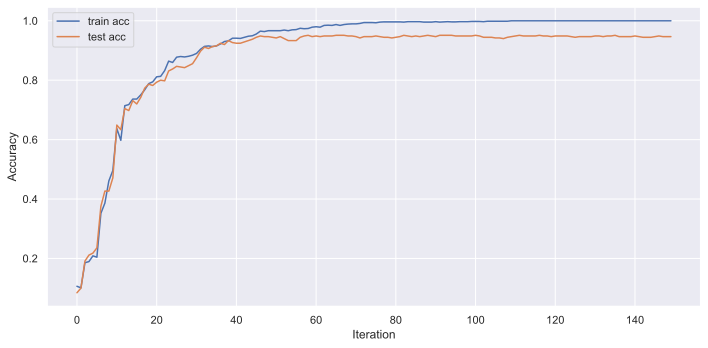

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [70]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [71]:
np.random.seed(1000)

for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, i + 1, ReLU)

        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True
        )
        accs_train[i, j] = accuracy_score(y_train, predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_test, predict(network, X_test))

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

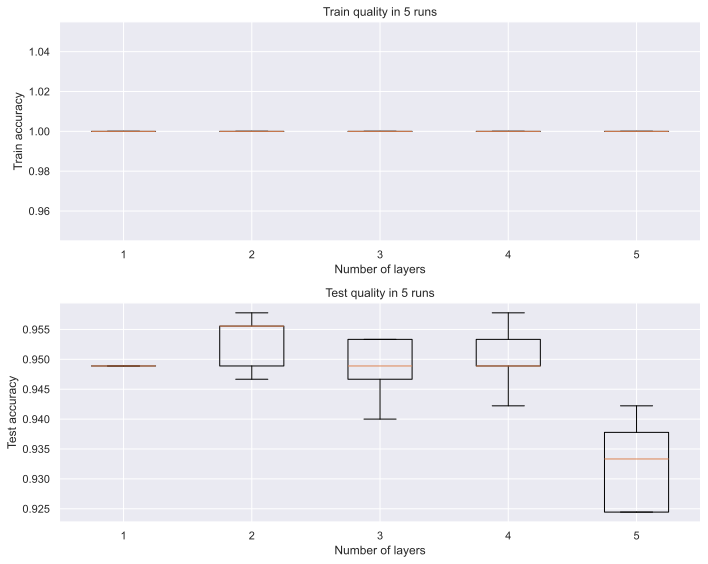

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

1. Качество на обучении не зависит от числа слоев.
2. Качество на контроле наибольшее (в среднем) в случае 2-х слоев. При этом сети с одним, тремя и четырьмя слоями дают примерно такое же качество.
3. Сеть с 5-ю слоями даёт существенно меньшее качество, чем сети с 1-4 слоями (наблюдается переобучение).
4. С увеличением числа слоев устойчивость процесса обучения снижается (больше разброс качества).
5. Сеть с одним слоем (логистическая регрессия) имеет существенно меньший разброс качества (то есть процесс обучения более стабильный), в отличие от сетей с 2-5 слоями. При этом логистическая регрессия даёт достаточно хорошее качество, т.к. у сетей с 2-5 слоями были запуски, где качество меньше. Поэтому нельзя сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель.

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [73]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                bound = np.sqrt(6 / input_units)
                layer.weights = np.random.uniform(-bound, bound, layer.weights.shape)
            elif initialization == 'Xavier':
                bound = np.sqrt(6 / (input_units + output_units))
                layer.weights = np.random.uniform(-bound, bound, layer.weights.shape)
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [74]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [75]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [76]:
N_LAYERS = 3

np.random.seed(1000)
network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, ReLU)

for i in range(5):
    for j in range(5):
        initialize_network(network, init_vars[i])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True
        )
        accs_train[i, j] = accuracy_score(y_train, predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_test, predict(network, X_test))

In [77]:
np.allclose(accs_train, np.ones_like(acc_train), rtol=1e-3, atol=0)

True

In [78]:
print("N(0,1):")
for j in range(5):
    initialize_network(network, 1)
    res = minimize(
        compute_loss_grad, get_weights(network),  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True
    )
    print(f"Train acc: {accuracy_score(y_train, predict(network, X_train)) :.6f}")
    print(f"Test acc: {accuracy_score(y_test, predict(network, X_test)) :.6f}")
    print()

N(0,1):


Train acc: 0.809948
Test acc: 0.773333

Train acc: 0.735709
Test acc: 0.675556

Train acc: 1.000000
Test acc: 0.922222

Train acc: 0.980698
Test acc: 0.906667

Train acc: 0.498886
Test acc: 0.464444



Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

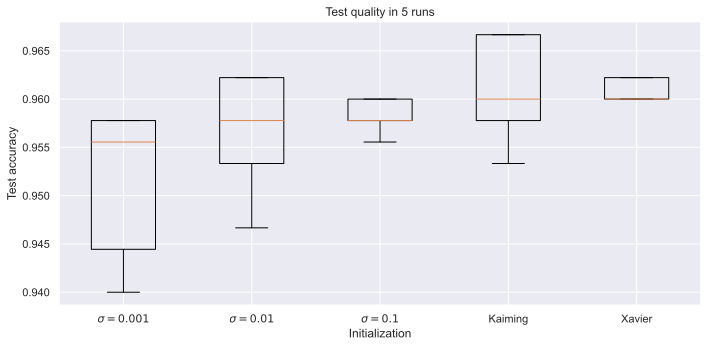

In [79]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [80]:
np.mean(accs_test, axis=1)

array([0.95111111, 0.95644444, 0.95911111, 0.96088889, 0.96088889])

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [81]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [82]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [83]:
N_LAYERS = 4

np.random.seed(42)
network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, ReLU)

for i in range(5):
    for j in range(5):
        initialize_network(network, init_vars[i])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True
        )
        accs_train[i, j] = accuracy_score(y_train, predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_test, predict(network, X_test))

np.allclose(accs_train, np.ones_like(acc_train), rtol=1e-3, atol=0)

True

In [84]:
print("N(0,1):")
for j in range(5):
    initialize_network(network, 1)
    res = minimize(
        compute_loss_grad, get_weights(network),  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True
    )
    print(f"Train acc: {accuracy_score(y_train, predict(network, X_train)) :.6f}")
    print(f"Test acc: {accuracy_score(y_test, predict(network, X_test)) :.6f}")
    print()

N(0,1):


Train acc: 0.512249
Test acc: 0.480000

Train acc: 1.000000
Test acc: 0.842222

Train acc: 0.997030
Test acc: 0.868889

Train acc: 0.140312
Test acc: 0.113333

Train acc: 0.986637
Test acc: 0.871111



Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

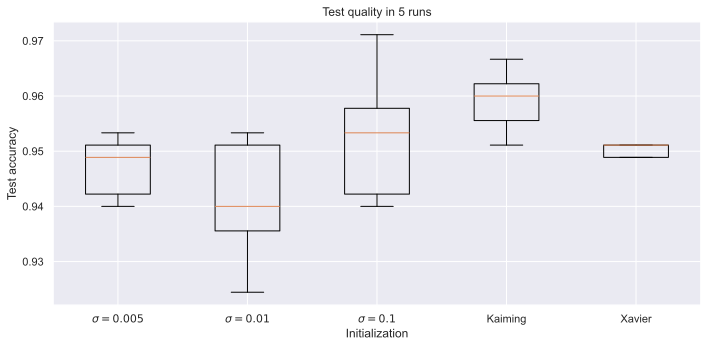

In [85]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [86]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [87]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [88]:
N_LAYERS = 5

np.random.seed(42)
network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, ReLU)

for i in range(5):
    for j in range(5):
        initialize_network(network, init_vars[i])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True
        )
        accs_train[i, j] = accuracy_score(y_train, predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_test, predict(network, X_test))

np.allclose(accs_train, np.ones_like(acc_train), rtol=1e-3, atol=0)

False

In [89]:
accs_train

array([[0.10616184, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.57980698, 1.        , 0.155902  , 0.21677803, 0.1091314 ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

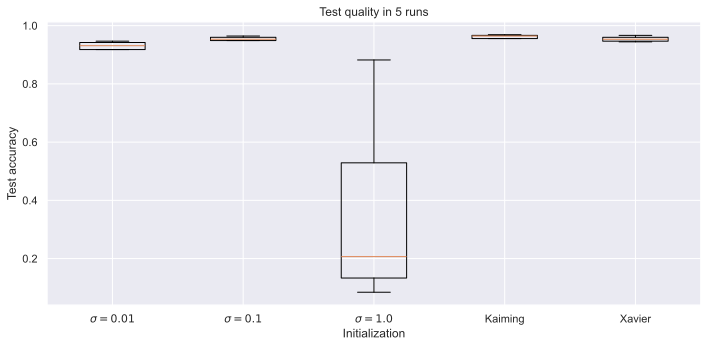

In [90]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

In [91]:
np.mean(accs_test, axis=1)

array([0.76444444, 0.95111111, 0.36711111, 0.96222222, 0.95422222])

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__
1. Для сети с 3-мя слоями самыми эффективными по качеству на контроле оказались инициализации Xavier и Kaiming, при этом инициализация Xavier имеет наименьший разборс значений.
Самой плохой по качеству и разбросу (из изображенных на графике) оказалась инициальзиция с нормальным распределением с центром в нуле и стандартным отклонением $\sigma = 0.001$.
2. Для сети с 4-мя слоями самой эффективной по среднему качеству оказалась инициальзация Kaiming.
3. Для сети с 5-ю слоями самой эффективной по среднему качеству также оказалась инициальзация Kaiming. Сравнимым с ней качеством обладают также инициализации Xavier и $\mathcal{N}(0, 0.1^2).$
4. Если инициализировать веса из стандартного нормального распределения, то процесс обучения может не сходится (наблюдается низкое качество на обучающей выборке). Таким образом, дисперсию нужно брать небольшой  ($<1$). Но также стоит заметить, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться (в случае 5-и слоев и $\sigma = 0.01$ обучающий процесс один раз не сошелся).
5. В целом, наиболее выигрышной инициализацией оказалась инициализация Kaiming. Это логично, ведь в данном случае мы использовали функцию активации ReLU. 

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [92]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [93]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [94]:
N_LAYERS = 4

np.random.seed(1000)
network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, ReLU)


for i in range(5):
    initialize_network(network, init_vars[i])
    cb = Callback(network, X_train, y_train, X_test, y_test)
    res = minimize(
        compute_loss_grad, get_weights(network),  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_test_on_iterations.append(cb.test_acc)
    accs_train_on_iterations.append(cb.train_acc)

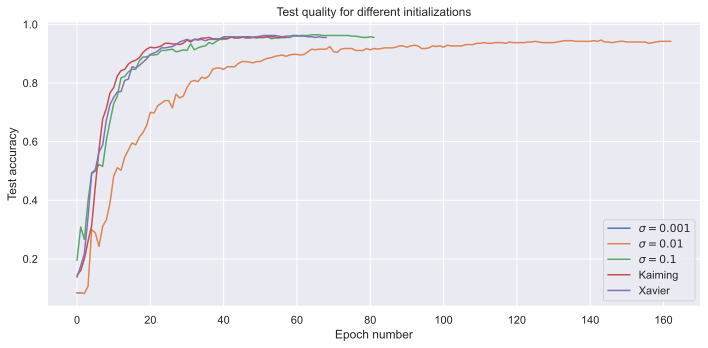

In [95]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)

ax.set_title("Test quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Test accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

In [96]:
print("sigma = 0.001:")
print("Train acc it:", accs_train_on_iterations[0])
print("Test acc it:", accs_test_on_iterations[0])

sigma = 0.001:
Train acc it: [0.10616184112843356, 0.10616184112843356]
Test acc it: [0.08444444444444445, 0.08444444444444445]


Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

1. Быстрее всего процесс обучения сошелся при инициализации Kaiming.
2. Немного больше итерация понадобилось инициализации Xavier и еще больше инициализации из $\mathcal{N}(0, 0.1^2)$.
3. Инициализации из $\mathcal{N}(0, 0.01^2)$ для сходимости понадобилось намного больше итераций, чем рассмотреным выше вариантам.
4. Процесс обучения не сошелся при инициализации из $\mathcal{N}(0, 0.001^2)$.

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [147]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.input = input
        return np.tanh(input)

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (1 / np.power(np.cosh(self.input), 2)), []

    def __repr__(self):
        return 'Tanh()'

In [148]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.outp = expit(input) 
        return self.outp

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (self.outp - np.power(self.outp, 2)), []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [149]:
act_func_vars = ['ReLU', 'Tanh', 'Sigmoid']
init_for_act_funcs = ['Kaiming', 'Xavier', 'Xavier']

In [150]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [151]:
N_LAYERS = 3

np.random.seed(1000)

act_funcs = [ReLU, Tanh, Sigmoid]

for i in range(3):
    network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, act_funcs[i])
    for j in range(5):
        initialize_network(network, init_for_act_funcs[i])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True
        )
        accs_train[i, j] = accuracy_score(y_train, predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_test, predict(network, X_test))

np.allclose(accs_train, np.ones_like(acc_train), rtol=1e-3, atol=0)

C:\Users\valer\AppData\Local\Temp\ipykernel_12092\3998119870.py:24: RuntimeWarning: overflow encountered in power
  return grad_output * (1 / np.power(np.cosh(self.input), 2)), []
C:\Users\valer\AppData\Local\Temp\ipykernel_12092\3998119870.py:24: RuntimeWarning: overflow encountered in power
  return grad_output * (1 / np.power(np.cosh(self.input), 2)), []
C:\Users\valer\AppData\Local\Temp\ipykernel_12092\3998119870.py:24: RuntimeWarning: overflow encountered in power
  return grad_output * (1 / np.power(np.cosh(self.input), 2)), []


False

In [152]:
accs_train

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.99851522, 1.        , 1.        ]])

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

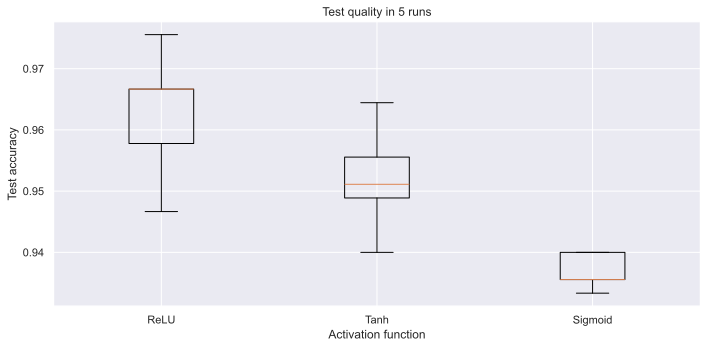

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

1. Лидером по качеству на контроле оказалась фукнция активации ReLU, но при этом у нее оказался самый большой разброс значений качества.
2. Сигмоидная функция активации оказалась хуже остальных по качеству на контроле, но при этом у неё оказался самый низкий разброс значений качества. Также в одном из запусков с этой функцией активации accuracy на обучающей выборке не достигла 1 (хотя и близка к ней).
3. При вычислении производной $tanh'(x) = \dfrac{1}{cosh^2(x)}$ возникает переполнение.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [286]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs.get('callback', None)   # feed weights from each iteration to update network and log metrics
    mu = kwargs.get('momentum', 0)
    n_iter = kwargs.get('n_iter', 1000)
    gamma = kwargs.get('lr', 0.1)
    jac = kwargs.get('jac', True)
    batch_size = kwargs.get('batch_size', 100)
    tolerance = kwargs.get("tolerance", 1e-5)
    
    net, X, y = args
    
    if jac != True:
        raise NotImplementedError

    res = OptimizeResult()
    res["tolerance exit"] = False

    theta = x0
    b = 0
    prev_loss = None
    loss = fun(theta, [net, X, y])[0]
    for t in range(1, n_iter + 1):
        obj_idx = np.arange(X.shape[0])
        np.random.shuffle(obj_idx)
        X_sh = X[obj_idx, :]
        y_sh = y[obj_idx]
        for i in range(0, X.shape[0], batch_size):
            X_batch = X_sh[i: i + batch_size, :]
            y_batch = y_sh[i: i + batch_size]
            _, g = fun(theta, [net, X_batch, y_batch])
            b = mu * b + g
            theta -= gamma * b
            
        if callback is not None:
            callback(theta)

        prev_loss = loss
        loss = fun(theta, [net, X, y])[0]
        if abs(prev_loss - loss) < tolerance:
            res["tolerance exit"] = True
            break

    res["x"] = theta
    res["success"] = True
    res["nit"] = t

    return res

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [179]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [219]:
from tqdm import tqdm

np.random.seed(1000)

for i in tqdm(range(5)):
    network = make_network(input_size, hidden_layers_size, output_size, i + 1, ReLU)
    for j in range(5):
        initialize_network(network, "Kaiming")
        res = SGD(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train],
            n_iter=1000,
            batch_size=100,
            lr=0.01,
            tolerance=5e-7
        )
        if not res["tolerance exit"]:
            print(f"{i}, {j}: the maximum number of iterations has been reached")
        accs_train[i, j] = accuracy_score(y_train, predict(network, X_train))
        accs_test[i, j] = accuracy_score(y_test, predict(network, X_test))

100%|██████████| 5/5 [02:21<00:00, 28.24s/it]


In [220]:
accs_train

array([[0.99777283, 0.99925761, 0.99925761, 0.99851522, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.99925761, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [221]:
accs_test

array([[0.95777778, 0.94222222, 0.95333333, 0.94666667, 0.96222222],
       [0.96222222, 0.96      , 0.95333333, 0.96222222, 0.96666667],
       [0.96      , 0.96888889, 0.95333333, 0.94666667, 0.96444444],
       [0.94888889, 0.95555556, 0.94444444, 0.95555556, 0.96444444],
       [0.96222222, 0.94222222, 0.96      , 0.94666667, 0.95111111]])

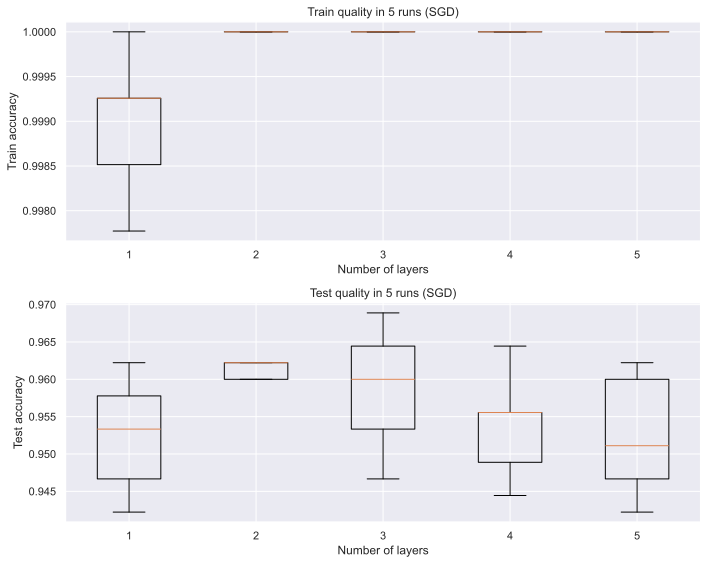

In [222]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs (SGD)")
axes[1].set_title("Test quality in 5 runs (SGD)")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [225]:
from time import time

N_LAYERS = 3
LR_NUM = 10

accs_train = np.zeros((LR_NUM, 2, 2))
accs_test = np.zeros_like(accs_train)
learning_time = np.zeros_like(accs_train)

np.random.seed(1000)
network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, ReLU)

for lr_idx, lr in enumerate(tqdm(np.logspace(-3, -1, LR_NUM))):
    for batch_size_idx, batch_size in enumerate([8, 32]):
        for momentum_idx, momentum in enumerate([0, 0.9]):
            initialize_network(network, "Kaiming")
            t = time()
            res = SGD(
                compute_loss_grad, get_weights(network),  
                args=[network, X_train, y_train],
                n_iter=1200,
                batch_size=batch_size,
                lr=lr,
                tolerance=5e-7,
                momentum=momentum
            )
            if not res["tolerance exit"]:
                print(f"{lr}, {batch_size}, {momentum}: the maximum number of iterations has been reached")
        
            learning_time[lr_idx, batch_size_idx, momentum_idx] = time() - t
            accs_train[lr_idx, batch_size_idx, momentum_idx] = accuracy_score(y_train, predict(network, X_train))
            accs_test[lr_idx, batch_size_idx, momentum_idx] = accuracy_score(y_test, predict(network, X_test))

 50%|█████     | 5/10 [03:53<03:10, 38.05s/it]

0.01291549665014884, 8, 0.9: the maximum number of iterations has been reached


 60%|██████    | 6/10 [06:50<05:40, 85.14s/it]

0.01291549665014884, 32, 0.9: the maximum number of iterations has been reached
0.021544346900318832, 8, 0.9: the maximum number of iterations has been reached


 70%|███████   | 7/10 [09:23<05:22, 107.42s/it]

0.03593813663804626, 8, 0.9: the maximum number of iterations has been reached


 80%|████████  | 8/10 [11:33<03:48, 114.40s/it]

0.05994842503189409, 8, 0: the maximum number of iterations has been reached
0.05994842503189409, 8, 0.9: the maximum number of iterations has been reached
0.05994842503189409, 32, 0: the maximum number of iterations has been reached


 90%|█████████ | 9/10 [16:34<02:52, 172.83s/it]

0.05994842503189409, 32, 0.9: the maximum number of iterations has been reached
0.1, 8, 0: the maximum number of iterations has been reached
0.1, 8, 0.9: the maximum number of iterations has been reached


100%|██████████| 10/10 [20:33<00:00, 123.38s/it]


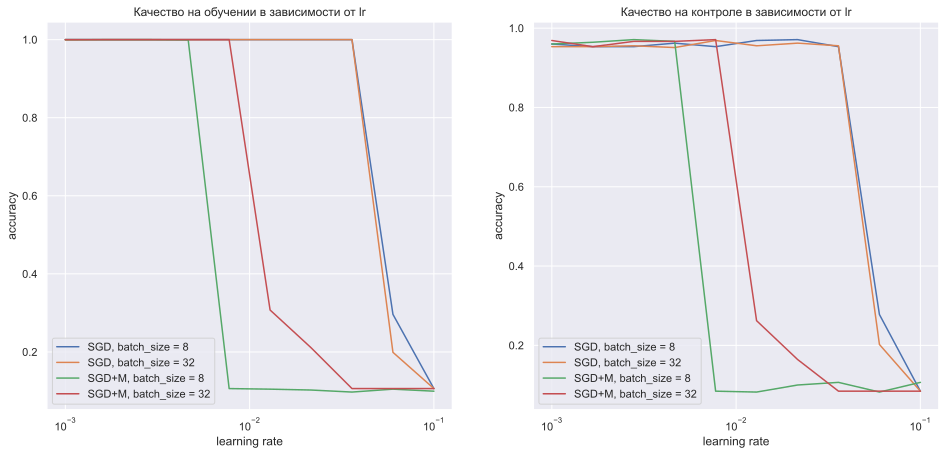

In [258]:
plt.figure(figsize=(16, 7))
lr_range = np.logspace(-3, -1, LR_NUM)
plt.subplot(1, 2, 1)
plt.plot(lr_range, accs_train[:, 0, 0], label="SGD, batch_size = 8")
plt.plot(lr_range, accs_train[:, 1, 0], label="SGD, batch_size = 32")
plt.plot(lr_range, accs_train[:, 0, 1], label="SGD+M, batch_size = 8")
plt.plot(lr_range, accs_train[:, 1, 1], label="SGD+M, batch_size = 32")
plt.legend()
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.title("Качество на обучении в зависимости от lr")

plt.subplot(1, 2, 2)
plt.plot(lr_range, accs_test[:, 0, 0], label="SGD, batch_size = 8")
plt.plot(lr_range, accs_test[:, 1, 0], label="SGD, batch_size = 32")
plt.plot(lr_range, accs_test[:, 0, 1], label="SGD+M, batch_size = 8")
plt.plot(lr_range, accs_test[:, 1, 1], label="SGD+M, batch_size = 32")
plt.legend()
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.title("Качество на контроле в зависимости от lr")

plt.show()

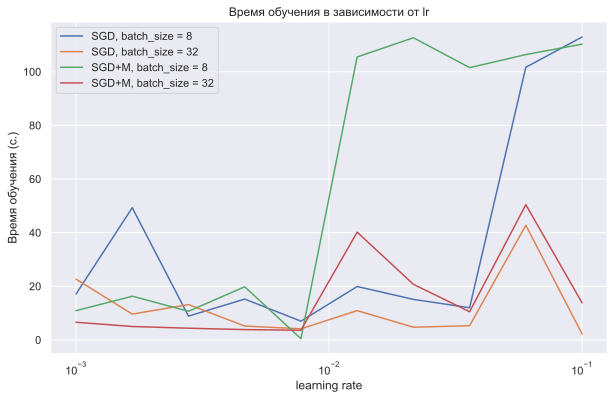

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(lr_range, learning_time[:, 0, 0], label="SGD, batch_size = 8")
plt.plot(lr_range, learning_time[:, 1, 0], label="SGD, batch_size = 32")
plt.plot(lr_range, learning_time[:, 0, 1], label="SGD+M, batch_size = 8")
plt.plot(lr_range, learning_time[:, 1, 1], label="SGD+M, batch_size = 32")
plt.legend()
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel("Время обучения (с.)")
plt.title("Время обучения в зависимости от lr")

plt.show()

In [271]:
accs_test_sgd = accs_test[:, :, 0]
accs_test_sgdm = accs_test[:, :, 1]

max_acc_sgd_idx = np.unravel_index(np.argmax(accs_test_sgd, axis=None), accs_test_sgd.shape)
max_acc_sgdm_idx = np.unravel_index(np.argmax(accs_test_sgdm, axis=None), accs_test_sgdm.shape)

sgd_lr = lr_range[max_acc_sgd_idx[0]]
sgdm_lr = lr_range[max_acc_sgdm_idx[0]]
batch_size_list = [8, 32]
sgd_batch_size = batch_size_list[max_acc_sgd_idx[1]]
sgdm_batch_size = batch_size_list[max_acc_sgdm_idx[1]]

print(f"Лучшие параметры для SGD:            lr = {sgd_lr:.4f}, batch_size = {sgd_batch_size}")
print(f"Лучшие параметры для SGD + momentum: lr = {sgdm_lr:.4f}, batch_size = {sgdm_batch_size}")


Лучшие параметры для SGD:            lr = 0.0215, batch_size = 8
Лучшие параметры для SGD + momentum: lr = 0.0028, batch_size = 8


In [310]:
np.random.seed(1000)

algs = ["L-BFGS-B", "SGD", "SGD+M"]

accs_train_on_iters = []
accs_test_on_iters = []

accs_train = np.zeros(3)
accs_test = np.zeros(3)
learning_time = np.zeros(3)

network = make_network(input_size, hidden_layers_size, output_size, N_LAYERS, ReLU)


for alg_idx, alg in enumerate(algs):
    initialize_network(network, "Kaiming")
    cb = Callback(network, X_train, y_train, X_test, y_test)
    t = time()
    if alg == "L-BFGS-B":
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        print(res["nit"])
    else:
        res = SGD(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train],
            n_iter=100,
            tolerance=0,
            batch_size=sgd_batch_size if alg == "SGD" else sgdm_batch_size,
            lr=sgd_lr if alg == "SGD" else sgdm_lr,
            momentum=0 if alg == "SGD" else 0.9,
            callback=cb.call
        )
    
    learning_time[alg_idx] = time() - t
    
    accs_test_on_iters.append(cb.test_acc)
    accs_train_on_iters.append(cb.train_acc)

    accs_train[alg_idx] = accuracy_score(y_train, predict(network, X_train))
    accs_test[alg_idx] = accuracy_score(y_test, predict(network, X_test))

65


In [311]:
print("Accuracy на X_train")
for alg_idx, alg in enumerate(algs):
    print(f"    {alg:9}: {accs_train[alg_idx]}")
print()

print("Accuracy на X_test")
for alg_idx, alg in enumerate(algs):
    print(f"    {alg:9}: {accs_test[alg_idx]:.6f}")
print()

print("Время обучения:")
for alg_idx, alg in enumerate(algs):
    print(f"    {alg:9}: {learning_time[alg_idx]:.2f} c.")

Accuracy на X_train
    L-BFGS-B : 1.0
    SGD      : 1.0
    SGD+M    : 1.0

Accuracy на X_test
    L-BFGS-B : 0.975556
    SGD      : 0.975556
    SGD+M    : 0.975556

Время обучения:
    L-BFGS-B : 0.67 c.
    SGD      : 9.54 c.
    SGD+M    : 10.36 c.


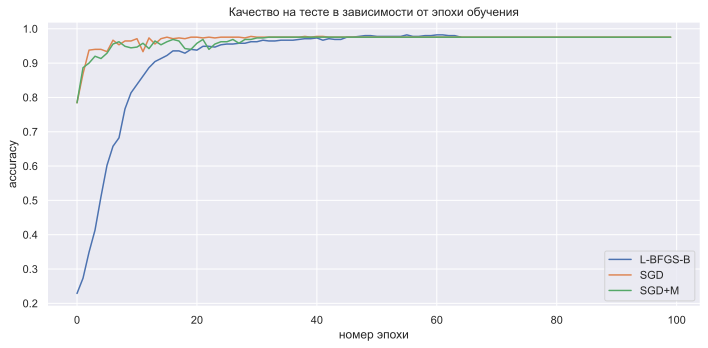

In [312]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(algs):
    ax.plot(accs_test_on_iters[idx], label=label)

ax.set_title("Качество на тесте в зависимости от эпохи обучения")
ax.set_xlabel("номер эпохи")
ax.set_ylabel("accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Выводы:**

1. Лучший параметр batch_size и для SGD, и для SGD + momentum оказался равным 8.
2. Лучший lr для SGD оказался на порядок больше, чем для SGD + momentum: 0.0215 и 0.0028 соответственно.
3. Все три алгоритма (L-BFGS-B, SGD, SGD + momentum) в итоге сошлись к одному и тому же качеству на тесте.
4. Алгоритму L-BFGS-B нужно больше эпох, чтобы сойтись, в отличие от двух остальных алгоритмов, которые почти сразу начинают с хорошего качества. При этом по времени алгоритм L-BFGS-B работал быстрее.
5. Кривая обучения у алгоритма L-BFGS-B более "гладкая", чем у остальных.
6. SGD без моментума достиг лучшего качества за меньшее число эпох, чем SGD + momentum.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**

1. Алгоритмы SGD и SGD + momentum при меньшем batch_size обучаются дольше по времени при фиксированной tolerance (см. график времени обучения выше).
2. Алгоритмы с бОльшим batch_size сходятся более плавно, т.к. они используют более точные оценки градиента функции потерь (происходит более стабильное обучение).
3. Большой batch_size может уменьшать эффективность моментума, поскольку обновления будут более сглаженными.
4. Оптимальным по качеству на тесте для обоих алгоритмов всё же оказался меньший batch_size. По-видимому, больший batch_size может приводить к более шумным обновлениям.

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.